In [3]:
# parsedata.py

import random
import os
import keras
from keras.preprocessing.text import Tokenizer
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
import matplotlib.pyplot as plt
import numpy as np
import sys

Train on 9001 samples, validate on 1001 samples
Epoch 1/10
9001/9001 [==============================] - 6s 672us/step - loss: 0.4383 - acc: 0.8298 - val_loss: 0.2546 - val_acc: 0.9051
Epoch 2/10
9001/9001 [==============================] - 5s 543us/step - loss: 0.1872 - acc: 0.9303 - val_loss: 0.2170 - val_acc: 0.9131
Epoch 3/10
9001/9001 [==============================] - 5s 527us/step - loss: 0.1171 - acc: 0.9616 - val_loss: 0.2172 - val_acc: 0.9081
Epoch 4/10
9001/9001 [==============================] - 5s 518us/step - loss: 0.0792 - acc: 0.9758 - val_loss: 0.2237 - val_acc: 0.9021
Epoch 5/10
9001/9001 [==============================] - 5s 519us/step - loss: 0.0517 - acc: 0.9878 - val_loss: 0.2396 - val_acc: 0.9061
Epoch 6/10
9001/9001 [==============================] - 5s 508us/step - loss: 0.0357 - acc: 0.9931 - val_loss: 0.2567 - val_acc: 0.9061
Epoch 7/10
9001/9001 [==============================] - 5s 515us/step - loss: 0.0237 - acc: 0.9972 - val_loss: 0.2751 - val_acc: 0.9031


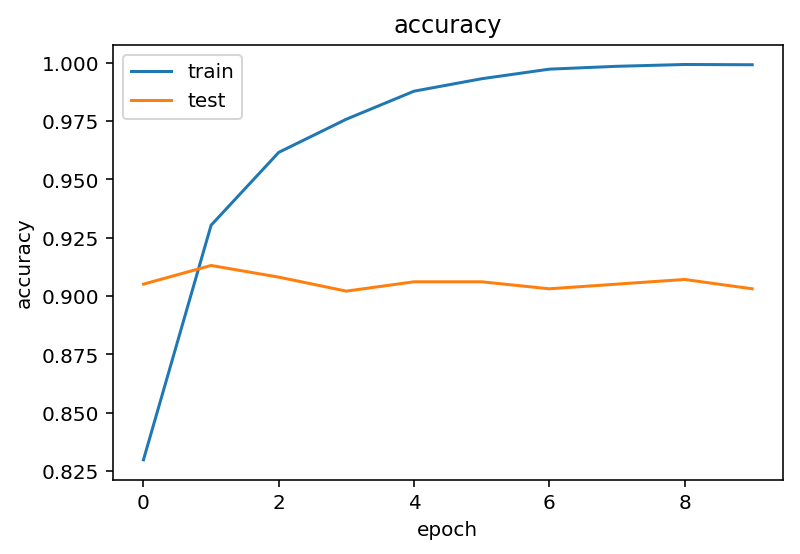

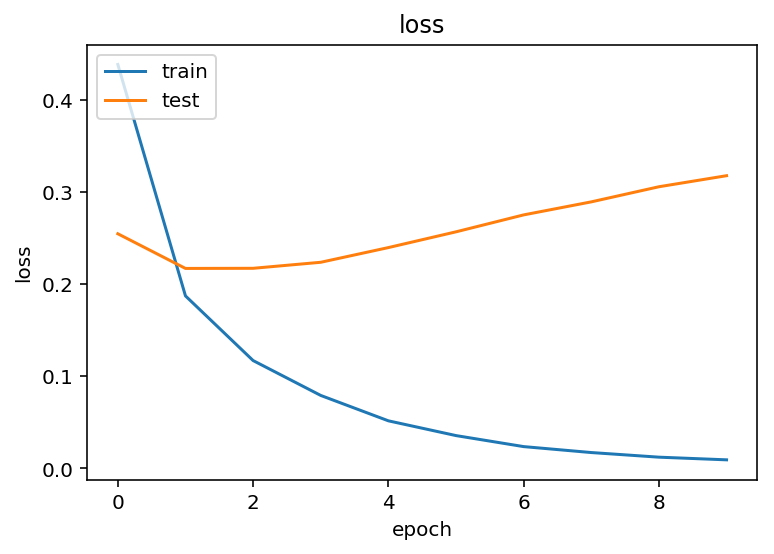

In [11]:
data_path_subj = r"C:\Users\--\Documents\GitHub\fake-news-authentication-platform\subjectivity-dataset\subj.txt" # subjective datasets' file path
data_path_obj = r"C:\Users\--\Documents\GitHub\fake-news-authentication-platform\subjectivity-dataset\obj.txt" # objective datasets' file path
dataset = []

with open(data_path_subj, 'r') as file:
    rawdata = file.read().split('\n')
    dataset.extend([(e, 0) for e in rawdata]) # 0: subj
with open(data_path_obj, 'r') as file:
    rawdata = file.read().split('\n')
    dataset.extend([(e, 1) for e in rawdata]) # 1: obj

random.shuffle(dataset)
train = int(0.9 * len(dataset)) # use 90% of the data for training...
test = len(dataset) - train # ...and 10% for testing.
train_set = dataset[0: min(train, len(dataset))]
test_set = dataset[(-min(test, len(dataset))-1): -1]

training_set_data = [i[0] for i in train_set] # x_train
training_set_labels = [i[1] for i in train_set] # y_train
testing_set_data = [i[0] for i in test_set] # x_val
testing_set_labels = [i[1] for i in test_set] # y_val

max_words = 5000
batch_size = 256
epochs = 10

# load dataset
x_train, y_train, x_val, y_val = training_set_data, training_set_labels, testing_set_data, testing_set_labels 

# prepare data
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(x_train)
x_train = tokenizer.texts_to_matrix(x_train)
x_val = tokenizer.texts_to_matrix(x_val)
y_train = keras.utils.to_categorical(y_train, 2)
y_val = keras.utils.to_categorical(y_val, 2)

# build model
model = Sequential()

model.add(Dense(512, input_shape=(max_words,)))
model.add(Activation('relu'))

model.add(Dropout(0.5))

model.add(Dense(2))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

              # show graph of loss and accuracy

# train model
model_log = model.fit(x_train, y_train,
                    validation_data=(x_val, y_val),
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_split=0.1)

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

plt.plot(model_log.history['acc'])
plt.plot(model_log.history['val_acc'])
plt.title('accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(model_log.history['loss'])
plt.plot(model_log.history['val_loss'])
plt.title('loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()




             precision    recall  f1-score   support

   positive       0.91      0.91      0.91       518
   negative       0.90      0.90      0.90       483

avg / total       0.90      0.90      0.90      1001



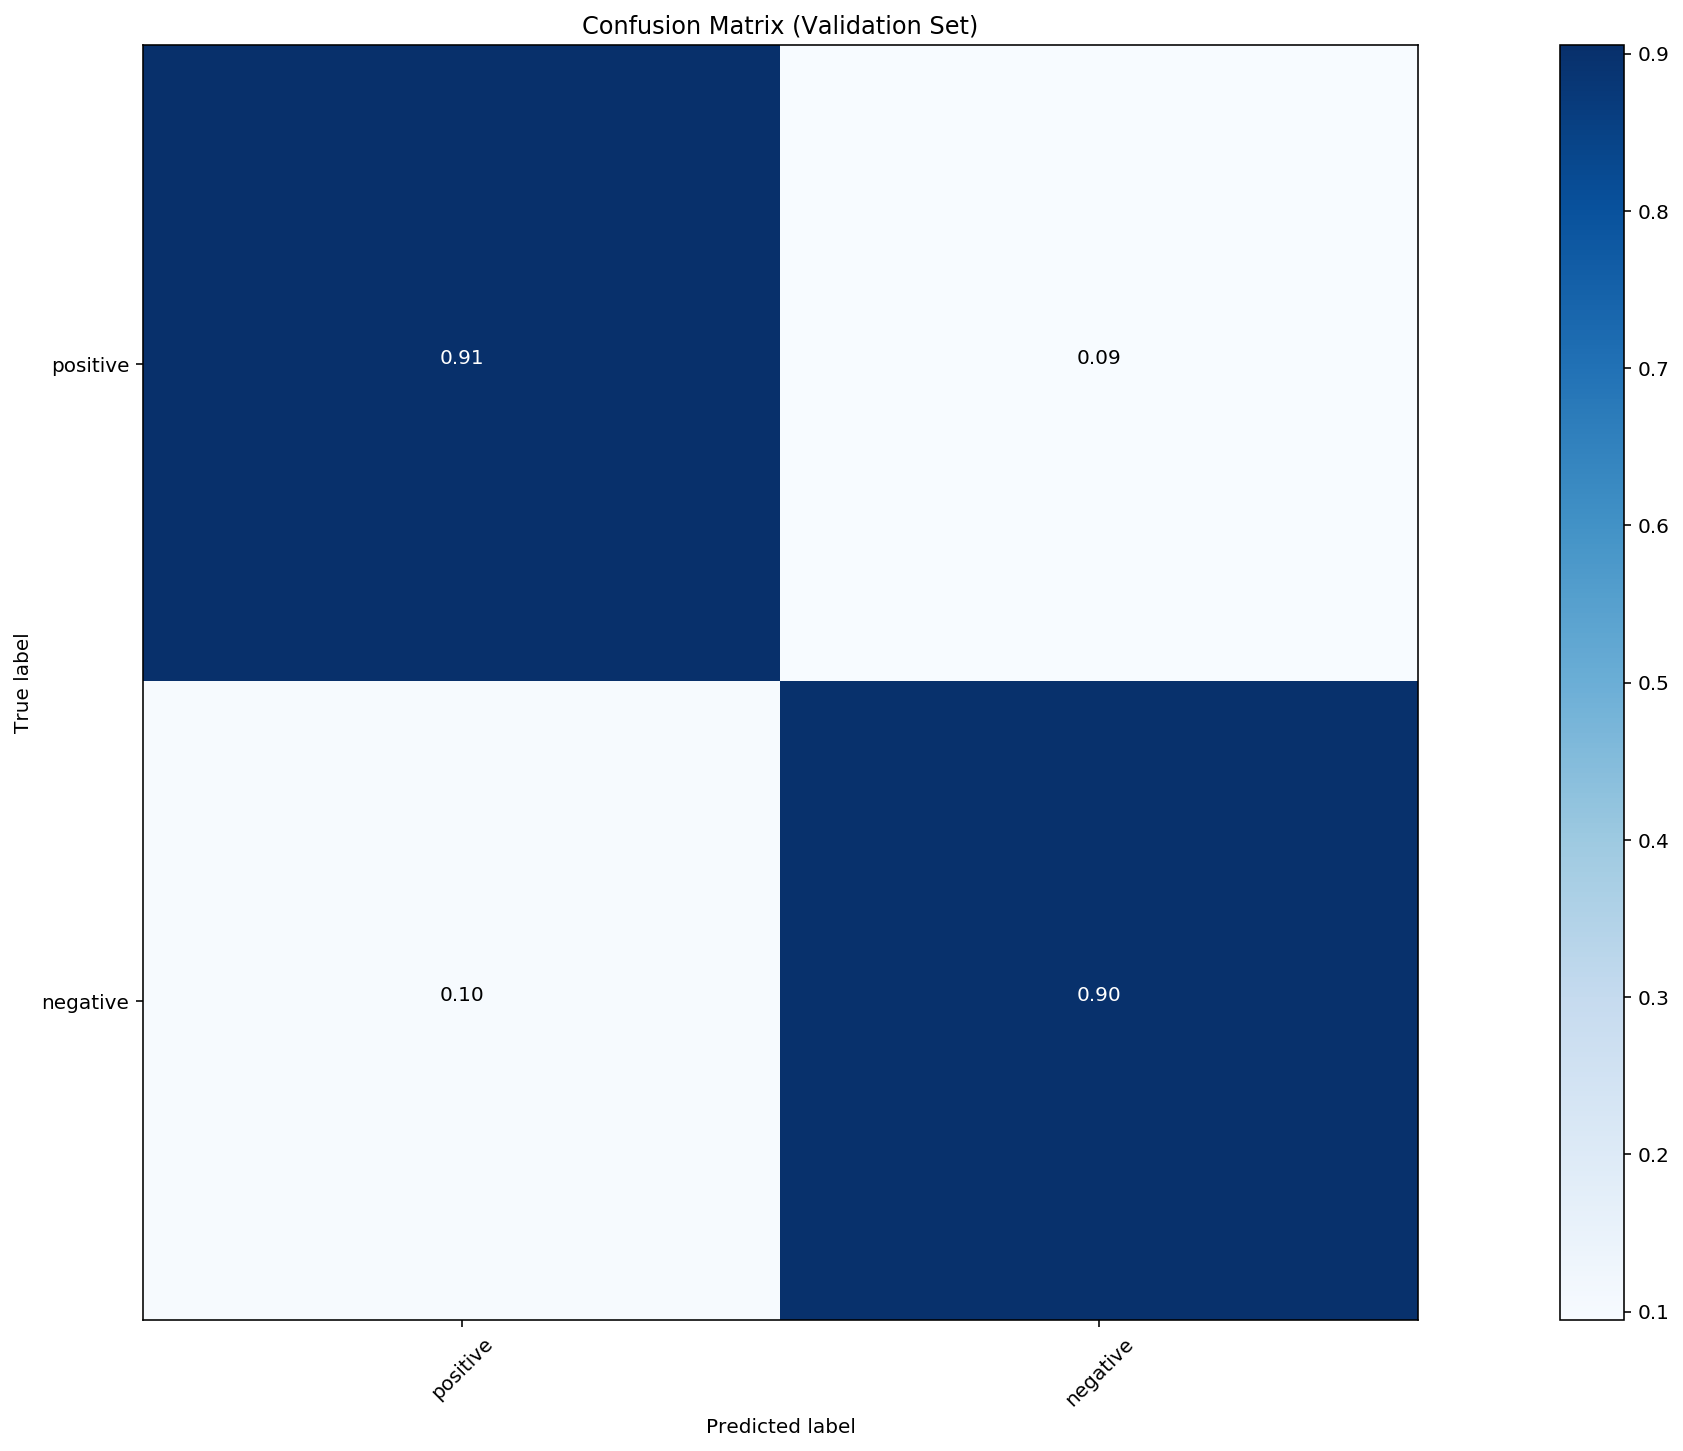

In [12]:
# draw confusion matrix
from sklearn.metrics import classification_report, confusion_matrix
import itertools, pickle

classes = ["positive", "negative"]

Y_test = np.argmax(y_val, axis=1) # Convert one-hot to index
y_pred = model.predict(x_val)
y_pred_class = np.argmax(y_pred,axis=1)
cnf_matrix = confusion_matrix(Y_test, y_pred_class)
print(classification_report(Y_test, y_pred_class, target_names=classes))

def plot_confusion_matrix(cm, labels,
                          normalize=True,
                          title='Confusion Matrix (Validation Set)',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    else:
        #print('Confusion matrix, without normalization')
        pass

    #print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(labels))
    plt.xticks(tick_marks, labels, rotation=45)
    plt.yticks(tick_marks, labels)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

plt.figure(figsize=(20,10))
plot_confusion_matrix(cnf_matrix, labels=classes)